In [1]:
import sys
import argparse
import numpy as np
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

from keras.preprocessing import image
from keras.models import load_model
from keras.applications.inception_v3 import preprocess_input


target_size = (229, 229) #fixed size for InceptionV3 architecture

Using TensorFlow backend.


In [2]:
def predict(model, img, target_size):
  """Run model prediction on image
  Args:
    model: keras model
    img: PIL format image
    target_size: (w,h) tuple
  Returns:
    list of predicted labels and their probabilities
  """
  if img.size != target_size:
    img = img.resize(target_size)

  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  preds = model.predict(x)
  return preds[0]

In [3]:
def plot_preds(image, preds):
  """Displays image and the top-n predicted probabilities in a bar graph
  Args:
    image: PIL image
    preds: list of predicted labels and their probabilities
  """
  plt.imshow(image)
  plt.axis('off')

  plt.figure()
  labels = ("cat", "dog")
  plt.barh([0, 1], preds, alpha=0.5)
  plt.yticks([0, 1], labels)
  plt.xlabel('Probability')
  plt.xlim(0,1.01)
  plt.tight_layout()
  plt.show()

In [7]:
model = load_model('inceptionv3-ft.model')

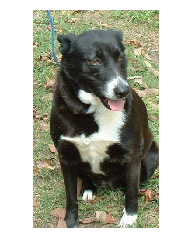

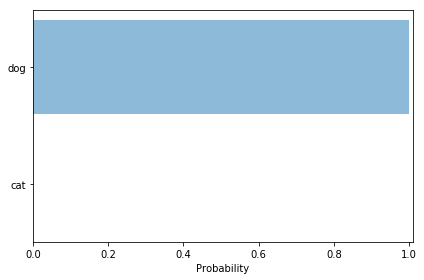

In [8]:
img = Image.open('./kaggle-dogcat/test1/1000.jpg')
preds = predict(model, img, target_size)
plot_preds(img, preds)